In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

In [2]:
analysis = pd.read_csv(os.path.join("..", "data","analysis_p1.csv"))

analyze_2021 = analysis[
     (analysis["YearStart"] == 2021) & (analysis["YearEnd"] == 2021)
 ][["LocationAbbr", "diabetes_y", "poverty_x", "LocationDesc"]]

Slope estimate: 0.365
95% CI: (0.299, 0.431)


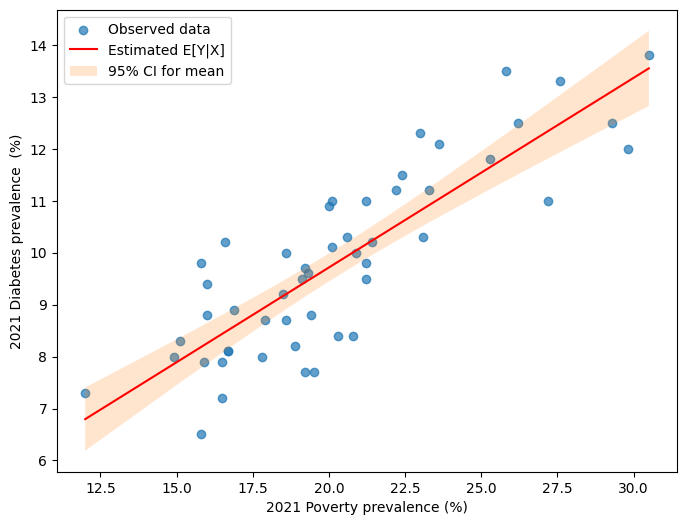

In [3]:
# 2021 Model for Robustness Check
x_21 = analyze_2021["poverty_x"]
y_21 = analyze_2021["diabetes_y"]

# X for modeling (2D: const + x)
X_21  = sm.add_constant(x_21)

# Fit 
results_21 = sm.OLS(y_21 , X_21).fit()

# Get estimated coefficient & confidence interval
coef_21 = results_21.params["poverty_x"]
ci_low_21, ci_high_21 = results_21 .conf_int().loc["poverty_x"]

print(f"Slope estimate: {coef_21:.3f}")
print(f"95% CI: ({ci_low_21:.3f}, {ci_high_21:.3f})")

# Prediction intervals / CI for the mean
pred_21 = results_21.get_prediction(X_21)
pred_df_21 = pred_21.summary_frame()

# Sort by x so the line/band doesn't zig-zag
order_21  = np.argsort(x_21.values)
x_sorted_21  = x_21.values[order_21]

# Best estimate of avg diabetes prevelance across states
y_hat_21 = results_21.fittedvalues.values[order_21]

# Confidence interval for the mean
ci_l_21 = pred_df_21 ["mean_ci_lower"].values[order_21]
ci_u_21 = pred_df_21 ["mean_ci_upper"].values[order_21]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_21, y_21, alpha=0.7, label="Observed data")
ax.plot(x_sorted_21, y_hat_21, "r-", label="Estimated E[Y|X]")
ax.fill_between(x_sorted_21, ci_l_21, ci_u_21, alpha=0.2, label="95% CI for mean")

ax.set_xlabel("2021 Poverty prevalence (%)")
ax.set_ylabel("2021 Diabetes prevalence  (%)")
ax.legend()
plt.show()